In [32]:
import pandas as pd
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import os
directory = '/home/surya/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/act'
z = '~/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/act/'
#my_df = pd.DataFrame()
#my_df = pd.read_csv('data_set.csv')

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        a = z + filename
        print('Under Progress',filename)
        
        ##################################
        name = filename
        sstring1 = 'csi_walk_'
        sstring2 = '.csv'
        res = name.replace(sstring1, '') 
        res = res.replace(sstring2, '') 
        labels = [res + '-01',res + '-02',res + '-03',res + '-04',res + '-05',res + '-06']
        #print(labels)
        #print(res)
        
        y = [0,0,0,0,0,0]
        V2 = np.zeros((30,6))
        V_no = np.zeros(30)
        Var_mean = np.zeros((6,1))
        
        ##################################
        
        csv = a
        df = pd.read_csv(csv,usecols=range(1,91))
        df =df.applymap(lambda s: np.complex(s.replace('i', 'j')))
        
        ##################################
        
        for i in range(1, 31):
            Z = []
            k = 'c_'
            Z.append(k + str(i))
            
            
            b= df[Z[0]].values

            b_1 = b[0:5000]
            m_b1 = np.mean(abs(b_1))

            b_2 = b[5000:10000]
            m_b2 = np.mean(abs(b_2))
    
            b_3 = b[10000:15000]
            m_b3 = np.mean(abs(b_3))
    
            b_4 = b[15000:20000]
            m_b4 = np.mean(abs(b_4))
    
            b_5 = b[20000:25000]
            m_b5 = np.mean(abs(b_5))
    
            b_6 = b[25000:30000]
            m_b6 = np.mean(abs(b_6))
            
            var = [np.var((abs(b_1)-m_b1)),np.var((abs(b_2)-m_b2)),np.var((abs(b_3)-m_b3)),np.var((abs(b_4)-m_b4)),np.var((abs(b_5)-m_b5)),np.var((abs(b_6)-m_b6))]
            V2[i-1][:] = var
                
                
        n = np.arange(1,31)
        m1 = np.mean(V2[:,0])
        m2 = np.mean(V2[:,1])
        m3 = np.mean(V2[:,2])
        m4 = np.mean(V2[:,3])
        m5 = np.mean(V2[:,4])
        m6 = np.mean(V2[:,5])
        
        Var_mean = [m1,m2,m3,m4,m5,m6]
        Var_mean = (np.round(Var_mean,decimals = 2))
            
        data_temp = [labels,Var_mean,y]
        
        df_temp = pd.DataFrame(np.transpose(data_temp))
        my_df = my_df.append(df_temp)
            
        #print(data_temp)
        
        
print(my_df)
#my_df.to_csv('data_set_no_act.csv', index=False) 

print('done !!')
        

Under Progress csi_walk_d6e5_2.csv
Under Progress csi_walk_a4c6_1.csv
Under Progress csi_walk_c1_1.csv
Under Progress csi_walk_a3d6_2.csv
Under Progress csi_walk_b1_1.csv
Under Progress csi_walk_b2_1.csv
Under Progress csi_walk_b6e3_2.csv
Under Progress csi_walk_a4c6_2.csv
Under Progress csi_walk_e2_1.csv
Under Progress csi_walk_b1e4_2.csv
Under Progress csi_walk_a4_1.csv
Under Progress csi_walk_a5e1_2.csv
Under Progress csi_walk_a6e2_1.csv
Under Progress csi_walk_e1_1.csv
Under Progress csi_walk_a5_1.csv
Under Progress csi_walk_a2b1_1.csv
Under Progress csi_walk_d1e2_1.csv
Under Progress csi_walk_b6_1.csv
Under Progress csi_walk_a3c1_1.csv
Under Progress csi_walk_a5b6_1.csv
Under Progress csi_walk_a4d1_2.csv
Under Progress csi_walk_a2_1.csv
Under Progress csi_walk_a2b1_2.csv
Under Progress csi_walk_d4_1.csv
Under Progress csi_walk_c4_1.csv
Under Progress csi_walk_a4d1_1.csv
Under Progress csi_walk_d3_1.csv
Under Progress csi_walk_a5b6_2.csv
Under Progress csi_walk_a3c1_2.csv
Under Pro

In [25]:
var_c = my_df[my_df.columns[1]]
var_c = np.array(var_c)
print (var_c)

['0.23' '0.22' '0.24' '0.24' '0.24' '0.23' '0.23' '0.22' '0.23' '0.23'
 '0.23' '0.22' '4.95' '2.95' '5.56' '4.4' '5.34' '4.62' '0.48' '0.36'
 '0.52' '0.39' '0.4' '0.4' '0.21' '0.28' '0.25' '0.23' '0.28' '0.79'
 '0.74' '0.51' '0.56' '0.84' '0.47' '0.71' '0.58' '0.43' '0.86' '0.7'
 '0.82' '1.42' '1.02' '1.21' '2.38' '2.68' '2.11' '1.84' '1.59' '1.74'
 '1.52' '1.71' '0.53' '1.7' '0.4' '0.46' '0.51' '0.36' '0.58' '0.36'
 '0.24' '0.25' '0.25' '0.26' '0.24' '0.68' '0.58' '1.14' '0.52' '0.71'
 '0.85' '0.56' '0.34' '0.36' '0.33' '0.36' '0.38' '0.37' '1.49' '1.28'
 '0.44' '1.45' '0.46' '1.3' '1.59' '1.13' '0.43' '1.29' '1.64' '0.71'
 '0.19' '0.19' '0.19' '0.18' '0.19' '1.05' '0.32' '0.33' '0.33' '0.29'
 '0.29' '0.29' '1.23' '1.68' '2.06' '1.36' '2.22' '1.27' '0.41' '0.39'
 '0.44' '0.47' '0.41' '0.38' '0.28' '0.3' '0.3' '0.3' '0.28' '0.83' '1.53'
 '1.13' '1.31' '1.15' '1.23' '1.02' '0.27' '0.31' '0.33' '0.31' '0.31'
 '0.28' '0.59' '1.06' '1.22' '0.38' '0.98' '1.38' '0.98' '0.83' '0.91'
 '0.8' '0

In [26]:
data = pd.read_csv('data_set.csv')
print(data)
data.insert(3, "VAR_C", var_c)
print(data)
data.to_csv('data_set.csv', index=False) 

                    FILE  VAR_A   VAR  Y
0    csi_noactivity_1-01   2.02  1.01  0
1    csi_noactivity_1-02   1.05  0.59  0
2    csi_noactivity_1-03   1.45  0.77  0
3    csi_noactivity_1-04   1.47  0.78  0
4    csi_noactivity_1-05   1.44  0.77  0
..                   ...    ...   ... ..
367              d1_1-02   0.95  1.48  1
368              d1_1-03   1.02  1.55  1
369              d1_1-04   1.27  2.49  1
370              d1_1-05   1.17  2.48  1
371              d1_1-06   3.99  1.99  1

[372 rows x 4 columns]
                    FILE  VAR_A   VAR VAR_C  Y
0    csi_noactivity_1-01   2.02  1.01  0.23  0
1    csi_noactivity_1-02   1.05  0.59  0.22  0
2    csi_noactivity_1-03   1.45  0.77  0.24  0
3    csi_noactivity_1-04   1.47  0.78  0.24  0
4    csi_noactivity_1-05   1.44  0.77  0.24  0
..                   ...    ...   ...   ... ..
367              d1_1-02   0.95  1.48   0.2  1
368              d1_1-03   1.02  1.55  0.21  1
369              d1_1-04   1.27  2.49  0.25  1
370           

In [ ]:
# plotting the variances of 'b' receiver :  
import os
directory = '/home/surya/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/July19_csv'
z = '~/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/July19_csv/'

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        a = z + filename
        print('Under Progress',filename)
        csv = a
        df = pd.read_csv(csv,usecols=range(1,91))
        df =df.applymap(lambda s: np.complex(s.replace('i', 'j')))
        V = np.zeros((30,1))
        
        
        for i in range(1, 31):
            Z = []
            for k in ['b_']:
                Z.append(k + str(i)) 

                b= df[Z[0]].values
                #print(np.shape(b))
                m_b = np.mean(abs(b))
                V[i-1] = np.var((abs(b)-m_b)) 
            #print(V[i-1])
        
        n = np.arange(1,31)
        
        plt.plot(n,V,label = 'b_1')
        plt.plot(n,V_no,label = 'b_no_act')
        
        plt.show()
        
        
print('Mission Accomplished !!')    


In [6]:
import os
directory = '/home/surya/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/no_act'
z = '~/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/no_act/'

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        a = z + filename
        print('Under Progress',filename)
        

Under Progress csi_noactivity_1.csv
Under Progress csi_noactivity_2.csv


In [21]:
df_noact = pd.read_csv('data_set_no_act.csv')
df_act = pd.read_csv('data_set.csv')

df_noact = df_noact.append(df_act)

print(df_noact)

df_noact.to_csv('data_set.csv', index=False)

print('done')

                       0     1  2
0    csi_noactivity_1-01  1.01  0
1    csi_noactivity_1-02  0.59  0
2    csi_noactivity_1-03  0.77  0
3    csi_noactivity_1-04  0.78  0
4    csi_noactivity_1-05  0.77  0
..                   ...   ... ..
355              d1_1-02  1.48  1
356              d1_1-03  1.55  1
357              d1_1-04  2.49  1
358              d1_1-05  2.48  1
359              d1_1-06  1.99  1

[372 rows x 3 columns]
done


                    FILE  VAR_A  VAR_B  VAR_C  Y
0    csi_noactivity_1-01   2.02   1.01   0.23  0
1    csi_noactivity_1-02   1.05   0.59   0.22  0
2    csi_noactivity_1-03   1.45   0.77   0.24  0
3    csi_noactivity_1-04   1.47   0.78   0.24  0
4    csi_noactivity_1-05   1.44   0.77   0.24  0
..                   ...    ...    ...    ... ..
367              d1_1-02   0.95   1.48   0.20  1
368              d1_1-03   1.02   1.55   0.21  1
369              d1_1-04   1.27   2.49   0.25  1
370              d1_1-05   1.17   2.48   0.26  1
371              d1_1-06   3.99   1.99   0.69  1

[372 rows x 5 columns]


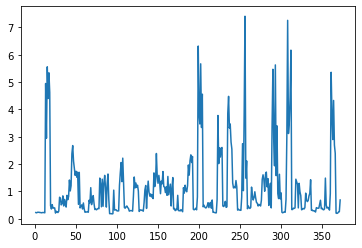

In [33]:
##### ANALYSIS OF THE DATA SET : 
data_set = pd.read_csv('data_set.csv')
print(data_set)

n = np.arange(1,373)
#print(n)
plt.plot(n,data_set['VAR_C'])